In [1]:
push!(LOAD_PATH, "../")
using Revise
using DivandAltimetry
using Statistics
using PyPlot
using Test

┌ Info: Recompiling stale cache file /home/ctroupin/.julia/compiled/v1.2/DivandAltimetry.ji for DivandAltimetry [top-level]
└ @ Base loading.jl:1240


In [2]:
datadir = "./"
datafile = joinpath(datadir, "nrt_blacksea_al_phy_vfec_l3_20170422_20170513.nc")
filelist = ["nrt_blacksea_al_phy_vfec_l3_20190101_20190122.nc",
            "nrt_blacksea_al_phy_vfec_l3_20190102_20190123.nc",
            "nrt_blacksea_al_phy_vfec_l3_20190103_20190124.nc"];
gridfile = joinpath(datadir, "nrt_blacksea_allsat_phy_l4_20190601_20190607.nc")

"./nrt_blacksea_allsat_phy_l4_20190601_20190607.nc"

In [3]:
@test DivandAltimetry.shiftlon(187.2) == -172.8

Test Passed

In [4]:
obsval,obslon,obslat,obstime = DivandAltimetry.loadaviso_alongtrack(datafile);
@test length(obsval) == 71
@test obsval[1] ≈ -0.011

Test Passed

In [5]:
@test_throws MethodError DivandAltimetry.loadaviso_alongtrack(1)

Test Passed
      Thrown: MethodError

In [6]:
# Load from a list of files
obsval,obslon,obslat,obstime = DivandAltimetry.loadaviso_alongtrack(filelist[2]);
@test obsval[end] ≈ 0.072
@test length(obsval) == 68

Test Passed

In [7]:
obsval,obslon,obslat,obstime = DivandAltimetry.loadaviso_alongtrack([]);
@test obslat === nothing
@test obsval === nothing

┌ Warning: Empty file list
└ @ DivandAltimetry /home/ctroupin/Projects/Altimetry-Interpolation/julia/DivandAltimetry.jl:88


Test Passed

In [8]:
# Read the grid
gridval,griderr,gridlon,gridlat,gridtime = DivandAltimetry.loadaviso_gridded(gridfile);

In [9]:
@test isnan(mean(griderr))
@test length(gridval) == 6720
@test griderr[2] === NaN
@test mean(filter(!isnan, gridval)) ≈ 0.1101407629255
@test size(gridval) == (120, 56)

Test Passed

In [10]:
r = DivandAltimetry.get_aspect_ratio(gridlon);
@test r ≈ -0.017482204

Test Failed at In[10]:2
  Expression: r ≈ -0.017482204
   Evaluated: 1.2134064202012318 ≈ -0.017482204


Test.FallbackTestSetException: There was an error during testing

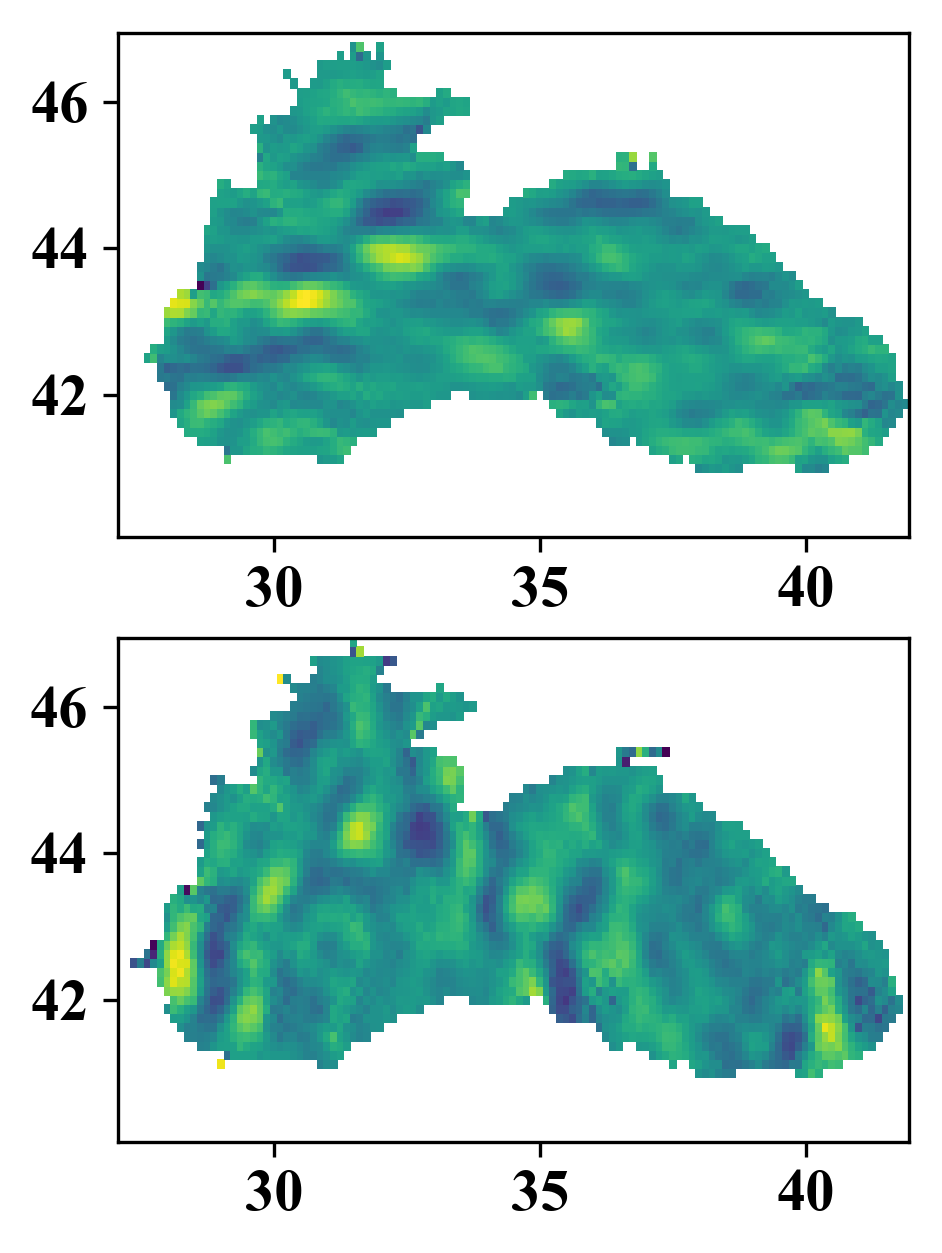

In [11]:
ratio = DivandAltimetry.get_aspect_ratio(gridlat);
gradX, gradY = DivandAltimetry.gradient2D(gridval);
subplot(2,1,1)
pcolormesh(gridlon, gridlat, gradX')
gca().set_aspect(ratio)
subplot(2,1,2)
pcolormesh(gridlon, gridlat, gradY')
gca().set_aspect(ratio)